# Forelesning 1: Programmering i kjemi

## Periodesystemet og periodiske egenskaper

In [ ]:
!pip install chemlib mendeleev pandas

In [75]:
from mendeleev import element # importerer klassen "element"

vanadium = element("V")
print(vanadium.boiling_point, vanadium.symbol, vanadium.name, vanadium.electronegativity())

3650.0 V Vanadium 1.63


In [76]:
from mendeleev import element

for Z in range(1,19):
    grunnstoff = element(Z)
    navn = grunnstoff.name
    symbol = grunnstoff.symbol
    el_neg = grunnstoff.electronegativity()
    print(f"{Z}: Navn: {navn}, symbol: {symbol}, elektronegativitet: {el_neg}")

1: Navn: Hydrogen, symbol: H, elektronegativitet: 2.2
2: Navn: Helium, symbol: He, elektronegativitet: None
3: Navn: Lithium, symbol: Li, elektronegativitet: 0.98
4: Navn: Beryllium, symbol: Be, elektronegativitet: 1.57
5: Navn: Boron, symbol: B, elektronegativitet: 2.04
6: Navn: Carbon, symbol: C, elektronegativitet: 2.55
7: Navn: Nitrogen, symbol: N, elektronegativitet: 3.04
8: Navn: Oxygen, symbol: O, elektronegativitet: 3.44
9: Navn: Fluorine, symbol: F, elektronegativitet: 3.98
10: Navn: Neon, symbol: Ne, elektronegativitet: None
11: Navn: Sodium, symbol: Na, elektronegativitet: 0.93
12: Navn: Magnesium, symbol: Mg, elektronegativitet: 1.31
13: Navn: Aluminum, symbol: Al, elektronegativitet: 1.61
14: Navn: Silicon, symbol: Si, elektronegativitet: 1.9
15: Navn: Phosphorus, symbol: P, elektronegativitet: 2.19
16: Navn: Sulfur, symbol: S, elektronegativitet: 2.58
17: Navn: Chlorine, symbol: Cl, elektronegativitet: 3.16
18: Navn: Argon, symbol: Ar, elektronegativitet: None


- Oppgave: Modifiser programmet slik at det skriver ut informasjonen (navn, symbol og elektronegativitet) om de 18 letteste grunnstoffene.

In [77]:
import matplotlib.pyplot as plt

atomnumre = []
el_neg = []

for Z in range(3,11):
    grunnstoff = element(Z)
    atomnumre.append(Z)
    el_neg.append(grunnstoff.electronegativity())

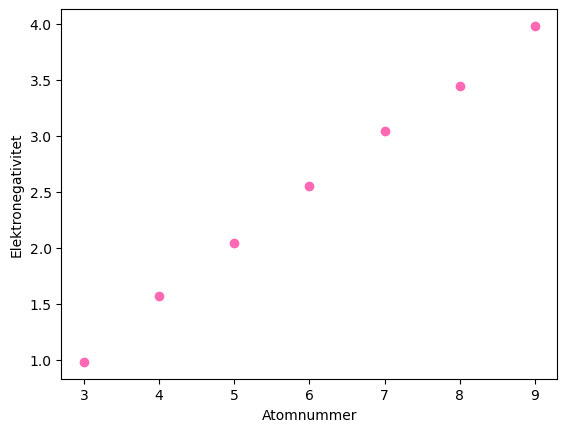

In [78]:
plt.scatter(atomnumre, el_neg, color = "hotpink")
plt.xlabel("Atomnummer")
plt.ylabel("Elektronegativitet")
plt.show()

- Oppgave: Plott listene mot hverandre. Modifiser programmet slik at det kun plotter grunnstoffene i andre periode. Forklar trenden du ser.

### Elektronegativitet i gruppe 1
Oppgave: Plott elektronegativitet som funksjon av atomnummer for grunnstoffene i gruppe 1.

## Støkiometriske beregninger

### Stoffmengdeberegninger

In [88]:
from chemlib import Compound

butan_1_ol = Compound("C4H9OH")
NH3 = Compound("NH3")

In [89]:
butan_1_ol.get_amounts(grams = 3.5)

{'grams': 3.5, 'molecules': 2.84257248087638e+22, 'moles': 0.0472188119746907}

In [90]:
butan_1_ol.get_amounts(moles = 1)

{'moles': 1, 'grams': 74.12300000000002, 'molecules': 6.02e+23}

### Kjemiske reaksjoner

In [91]:
from chemlib import Reaction

In [92]:
H2 = Compound("H2")
I2 = Compound("I2")
HI = Compound("HI")

In [93]:
reaksjon = Reaction([H2, I2],[HI])

In [94]:
print(reaksjon.formula)
print(reaksjon.is_balanced)

1H₂ + 1I₂ --> 1H₁I₁
False


In [95]:
reaksjon.balance()

In [96]:
print(reaksjon.formula)
print(reaksjon.is_balanced)

1H₂ + 1I₂ --> 2H₁I₁
True


- Oppgave: Bruk chemlib til å balansere ufullstendig forbrenning av benzen (vi får vann og CO)

In [97]:
benzen = Compound("C6H6")
O2 = Compound("O2")
CO = Compound("CO")
H2O = Compound("H2O")

reaksjon2 = Reaction([benzen, O2], [CO, H2O])
reaksjon2.balance()
print(reaksjon2.formula)
print(reaksjon2.is_balanced)

2C₆H₆ + 9O₂ --> 12C₁O₁ + 6H₂O₁
True


## Elektrokjemi (ekstrastoff)

### Galvaniske elementer

In [83]:
from chemlib import Galvanic_Cell

In [84]:
celle = Galvanic_Cell("Pb", "Zn")

In [85]:
print(celle.properties)

{'Cell': 'Zn | Zn2+ || Pb2+ | Pb', 'Anode': 'Zn', 'Cathode': 'Pb', 'Cell Potential': 0.63}


In [86]:
celle.draw()

### Elektrolyse

In [87]:
from chemlib import electrolysis

In [80]:
elektrolyse = electrolysis("Cu", n = 2, amps = 1, seconds = 3600)

In [81]:
elektrolyse

{'element': 'Cu',
 'n': 2,
 'seconds': 3600,
 'amps': 1,
 'grams': 1.1854982639788567}

- Oppgave: Finn ut hvor lang tid det minimum tar å dekke en gjenstand med 30 g sølv med en løsning AgNO$_3$ når vi bruker en strømstyrke på 10 A.

In [82]:
elektrolyse = electrolysis("Ag", n = 1, amps = 10, grams = 30)
elektrolyse["seconds"]/60

44.72364371268588